# Executable Cells with Thebe and Binder

This page demonstrates how to make notebook cells executable directly in the HTML output using Thebe and Binder. Users can run code cells without needing to install anything locally!

## What is Thebe?

Thebe (formerly Thebelab) is a JavaScript library that makes static HTML pages with code cells interactive by connecting them to a Jupyter kernel running on Binder.

## How it Works

1. **Static HTML**: Your Jupyter Book generates static HTML
2. **Thebe Integration**: Thebe adds "Run" buttons to code cells
3. **Binder Connection**: When clicked, cells connect to a live Jupyter kernel on Binder
4. **Live Execution**: Users can run code and see results in real-time

## Benefits

- No local installation required
- Always up-to-date environment
- Shareable and reproducible
- Works on any device with a web browser


## Interactive CFG Visualization

Try running the cells below to see interactive CFG visualization in action!


In [1]:
# Import libraries for CFG visualization
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Set up matplotlib for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.style.use('default')

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:
# Define a simple CFG for arithmetic expressions
grammar = {
    'E': ['E + T', 'E - T', 'T'],
    'T': ['T * F', 'T / F', 'F'],
    'F': ['( E )', 'id', 'num']
}

def create_cfg_graph(grammar):
    """Create a NetworkX graph from a CFG"""
    G = nx.DiGraph()
    
    for non_terminal, productions in grammar.items():
        G.add_node(non_terminal, node_type='non_terminal')
        
        for production in productions:
            symbols = production.split()
            for symbol in symbols:
                if symbol in grammar:  # Non-terminal
                    G.add_edge(non_terminal, symbol, label=production)
                else:  # Terminal
                    G.add_node(symbol, node_type='terminal')
                    G.add_edge(non_terminal, symbol, label=production)
    
    return G

print("✅ CFG graph creation function defined!")


✅ CFG graph creation function defined!


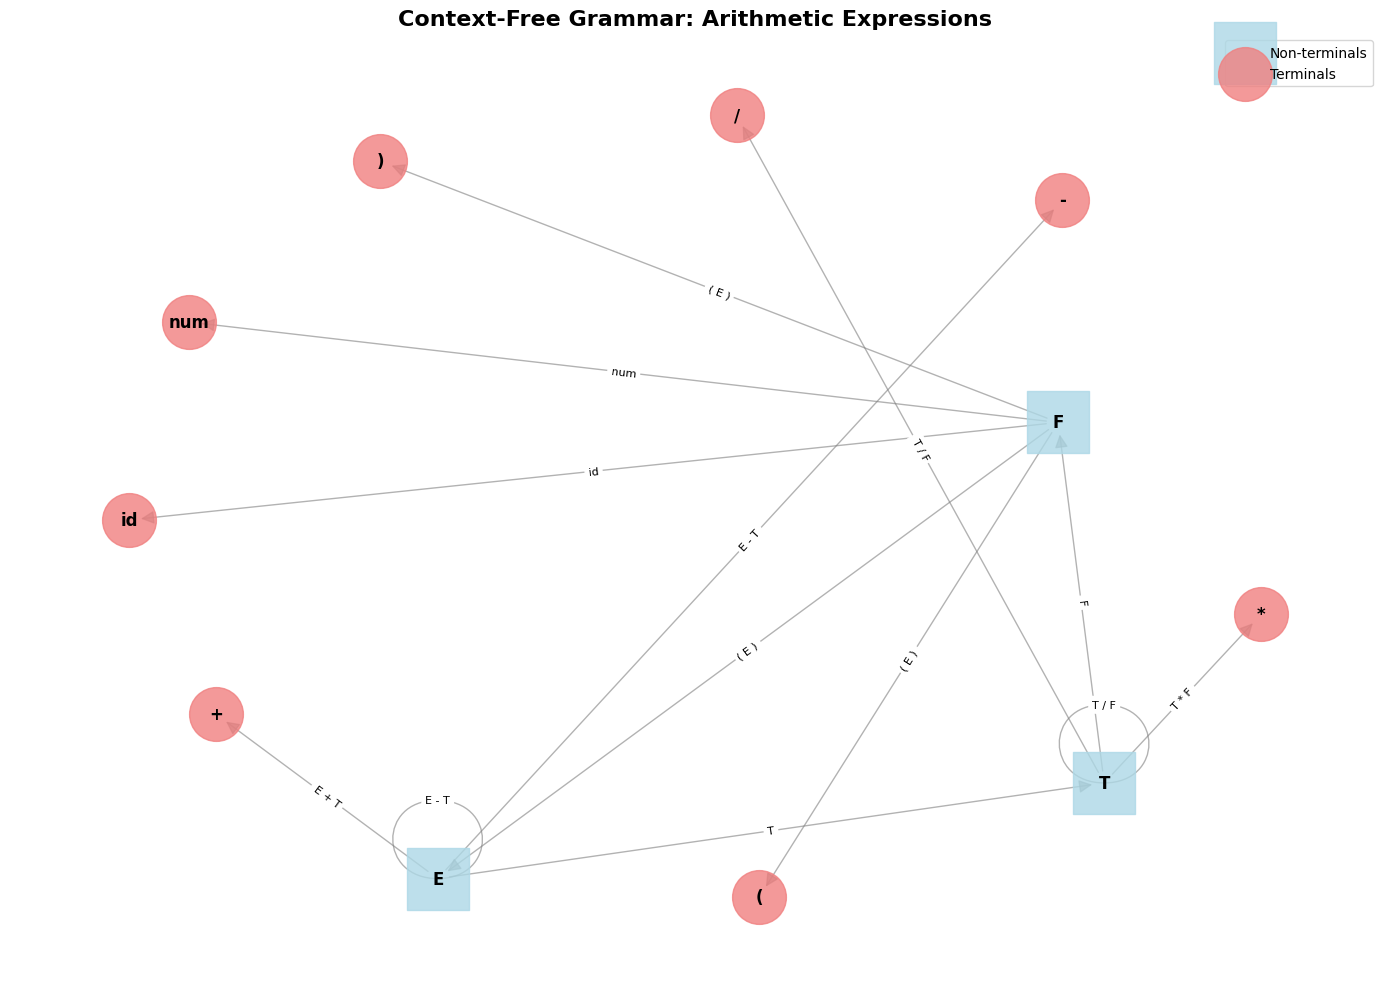


Grammar Rules:
E → E + T
E → E - T
E → T
T → T * F
T → T / F
T → F
F → ( E )
F → id
F → num


In [3]:
# Create and visualize the CFG
G = create_cfg_graph(grammar)

plt.figure(figsize=(14, 10))

# Use spring layout for better positioning
pos = nx.spring_layout(G, k=3, iterations=50)

# Separate nodes by type
non_terminals = [n for n, d in G.nodes(data=True) if d.get('node_type') == 'non_terminal']
terminals = [n for n, d in G.nodes(data=True) if d.get('node_type') == 'terminal']

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=non_terminals, 
                     node_color='lightblue', node_size=2000, 
                     node_shape='s', alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=terminals, 
                     node_color='lightcoral', node_size=1500, 
                     node_shape='o', alpha=0.8)

# Draw edges with labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, 
                      arrowsize=20, alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

plt.title('Context-Free Grammar: Arithmetic Expressions', fontsize=16, fontweight='bold')
plt.legend(['Non-terminals', 'Terminals'], loc='upper right')
plt.axis('off')
plt.tight_layout()
plt.show()

# Print grammar rules
print("\nGrammar Rules:")
print("=" * 30)
for non_terminal, productions in grammar.items():
    for production in productions:
        print(f"{non_terminal} → {production}")


## Interactive Syntax Tree Builder

Now let's build an interactive syntax tree parser and visualizer!


In [4]:
class SyntaxTreeBuilder:
    def __init__(self):
        pass
    
    def parse_expression(self, expr):
        """Simple recursive descent parser for arithmetic expressions"""
        expr = expr.replace(' ', '')
        
        # Handle parentheses
        if expr.startswith('(') and expr.endswith(')'):
            return self.parse_expression(expr[1:-1])
        
        # Find the rightmost + or - (lowest precedence)
        paren_count = 0
        for i in range(len(expr) - 1, -1, -1):
            if expr[i] == ')':
                paren_count += 1
            elif expr[i] == '(':
                paren_count -= 1
            elif paren_count == 0 and expr[i] in '+-':
                return {
                    'type': 'BinaryOp',
                    'op': expr[i],
                    'left': self.parse_expression(expr[:i]),
                    'right': self.parse_expression(expr[i+1:])
                }
        
        # Find the rightmost * or / (higher precedence)
        paren_count = 0
        for i in range(len(expr) - 1, -1, -1):
            if expr[i] == ')':
                paren_count += 1
            elif expr[i] == '(':
                paren_count -= 1
            elif paren_count == 0 and expr[i] in '*/':
                return {
                    'type': 'BinaryOp',
                    'op': expr[i],
                    'left': self.parse_expression(expr[:i]),
                    'right': self.parse_expression(expr[i+1:])
                }
        
        # If it's just a number
        if expr.isdigit() or (expr[0] == '-' and expr[1:].isdigit()):
            return {'type': 'Number', 'value': int(expr)}
        else:
            return {'type': 'Variable', 'name': expr}
    
    def visualize_tree(self, tree, ax=None, x=0, y=0, width=1, level=0):
        if ax is None:
            fig, ax = plt.subplots(figsize=(12, 8))
        
        # Draw current node
        if tree['type'] == 'BinaryOp':
            node_text = tree['op']
            color = 'lightblue'
        elif tree['type'] == 'Number':
            node_text = str(tree['value'])
            color = 'lightgreen'
        else:  # Variable
            node_text = tree['name']
            color = 'lightcoral'
        
        # Draw node
        circle = plt.Circle((x, y), 0.15, color=color, ec='black', linewidth=2)
        ax.add_patch(circle)
        ax.text(x, y, node_text, ha='center', va='center', fontsize=12, fontweight='bold')
        
        # Draw children
        if tree['type'] == 'BinaryOp':
            left_x = x - width/2
            right_x = x + width/2
            child_y = y - 0.4
            
            # Draw edges
            ax.plot([x, left_x], [y-0.15, child_y+0.15], 'k-', linewidth=2)
            ax.plot([x, right_x], [y-0.15, child_y+0.15], 'k-', linewidth=2)
            
            # Recursively draw children
            self.visualize_tree(tree['left'], ax, left_x, child_y, width/2, level+1)
            self.visualize_tree(tree['right'], ax, right_x, child_y, width/2, level+1)
    
    def evaluate_tree(self, tree, variables=None):
        if variables is None:
            variables = {}
        
        if tree['type'] == 'Number':
            return tree['value']
        elif tree['type'] == 'Variable':
            return variables.get(tree['name'], 0)
        elif tree['type'] == 'BinaryOp':
            left_val = self.evaluate_tree(tree['left'], variables)
            right_val = self.evaluate_tree(tree['right'], variables)
            
            if tree['op'] == '+':
                return left_val + right_val
            elif tree['op'] == '-':
                return left_val - right_val
            elif tree['op'] == '*':
                return left_val * right_val
            elif tree['op'] == '/':
                return left_val / right_val if right_val != 0 else float('inf')
        
        return 0

print("✅ SyntaxTreeBuilder class defined!")


✅ SyntaxTreeBuilder class defined!


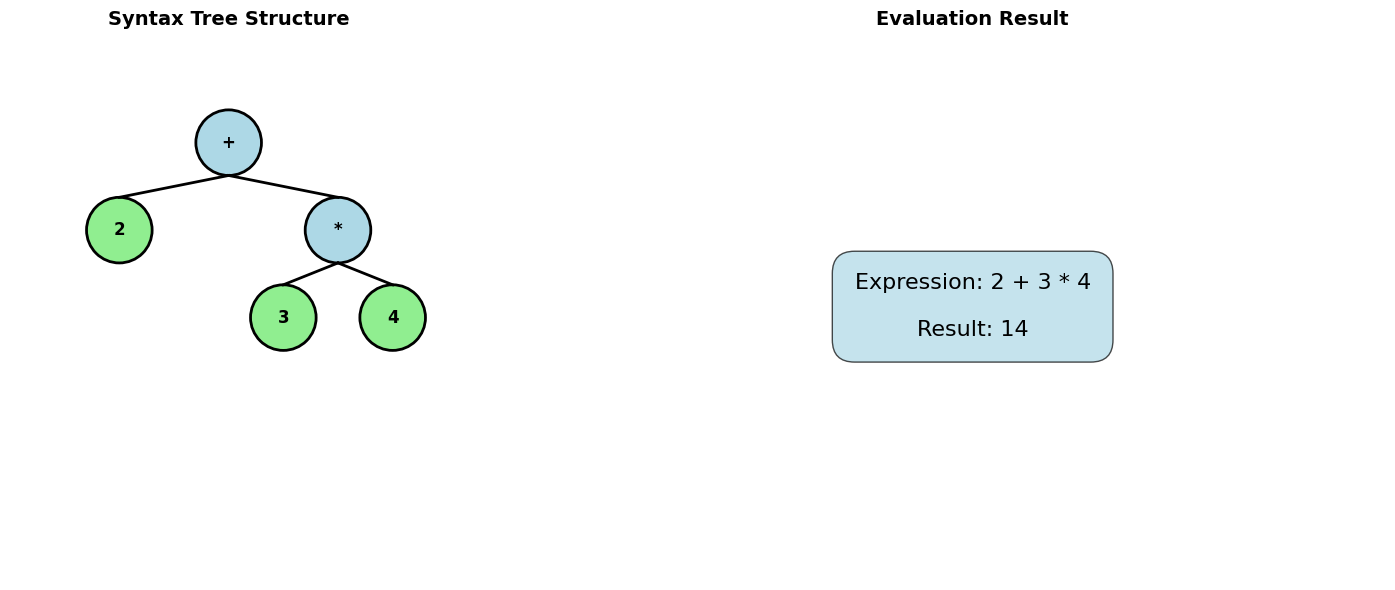


Tree Structure for '2 + 3 * 4':
{
  "type": "BinaryOp",
  "op": "+",
  "left": {
    "type": "Number",
    "value": 2
  },
  "right": {
    "type": "BinaryOp",
    "op": "*",
    "left": {
      "type": "Number",
      "value": 3
    },
    "right": {
      "type": "Number",
      "value": 4
    }
  }
}


In [5]:
# Test the syntax tree builder with a sample expression
tree_builder = SyntaxTreeBuilder()
expression = "2 + 3 * 4"

try:
    tree = tree_builder.parse_expression(expression)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Visualize tree
    tree_builder.visualize_tree(tree, ax1)
    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-2, 0.5)
    ax1.set_aspect('equal')
    ax1.set_title('Syntax Tree Structure', fontsize=14, fontweight='bold')
    ax1.axis('off')
    
    # Show evaluation
    result = tree_builder.evaluate_tree(tree)
    ax2.text(0.5, 0.5, f'Expression: {expression}\n\nResult: {result}', 
            ha='center', va='center', fontsize=16, 
            bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', alpha=0.7))
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.axis('off')
    ax2.set_title('Evaluation Result', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nTree Structure for '{expression}':")
    print("=" * 40)
    import json
    print(json.dumps(tree, indent=2))
    
except Exception as e:
    print(f"Error parsing expression: {e}")


## Try It Yourself!

Now you can experiment with different expressions and see how they parse into syntax trees!


🔍 Parsing example expressions:

Expression: 1 + 2 * 3


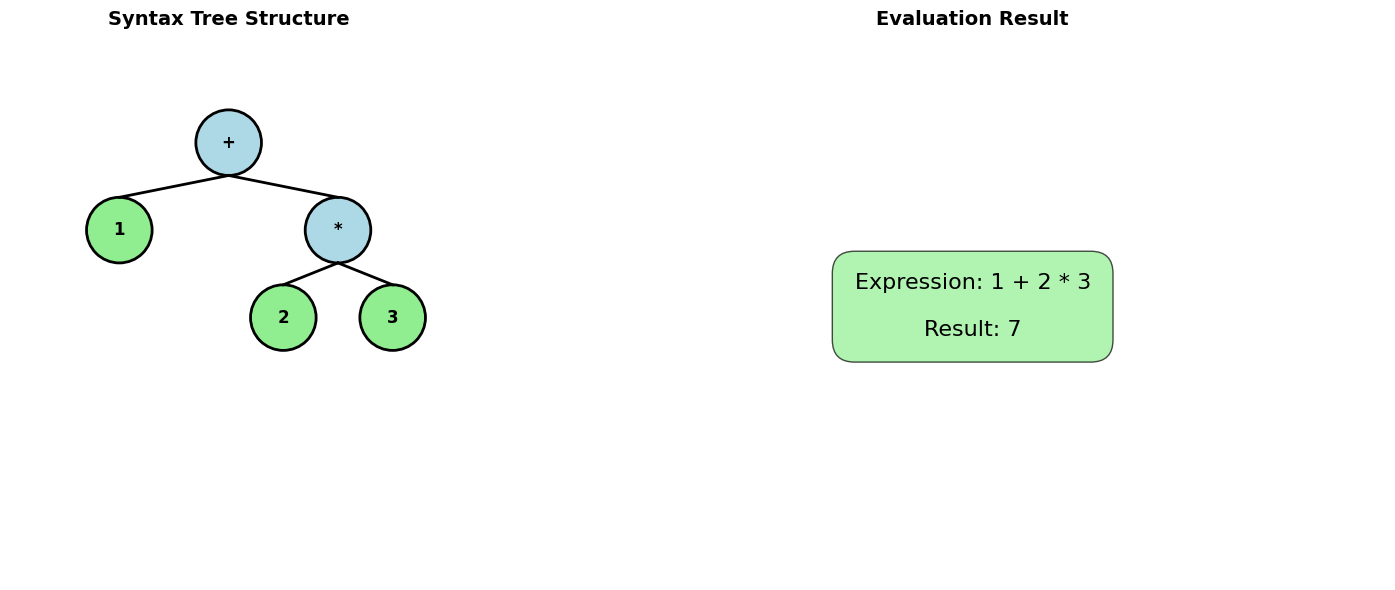

Result: 7
------------------------------

Expression: (1 + 2) * 3


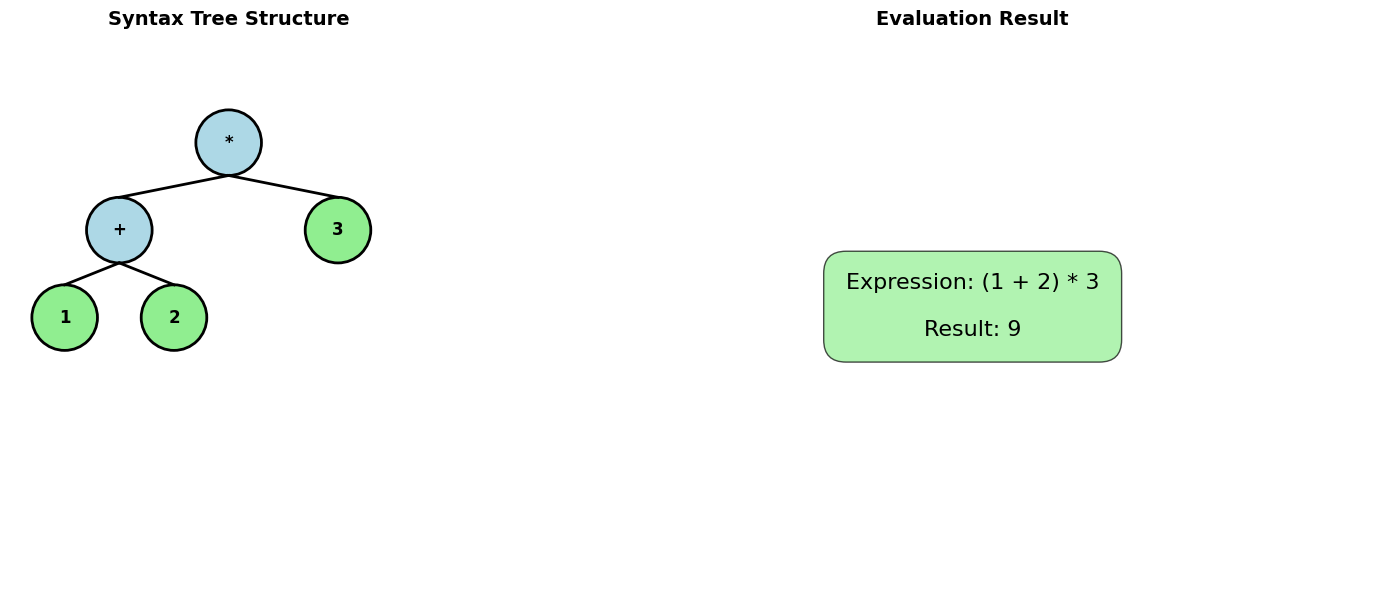

Result: 9
------------------------------

Expression: 10 - 5 + 2


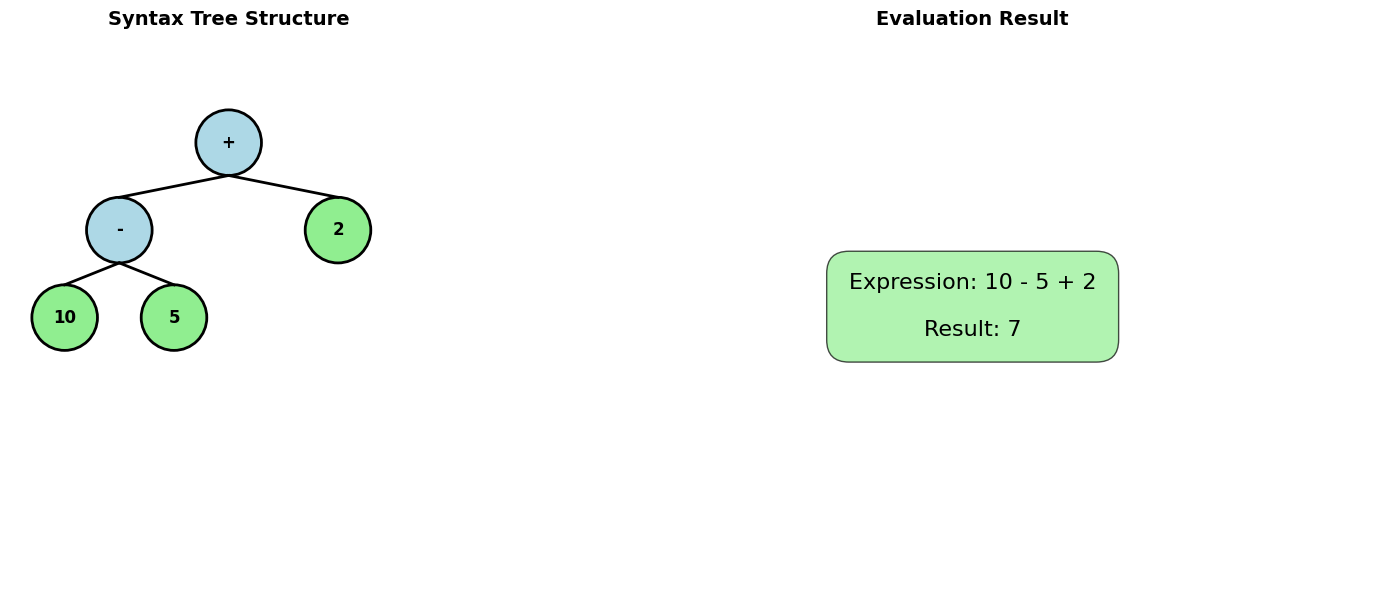

Result: 7
------------------------------

Expression: 2 * 3 + 4 * 5


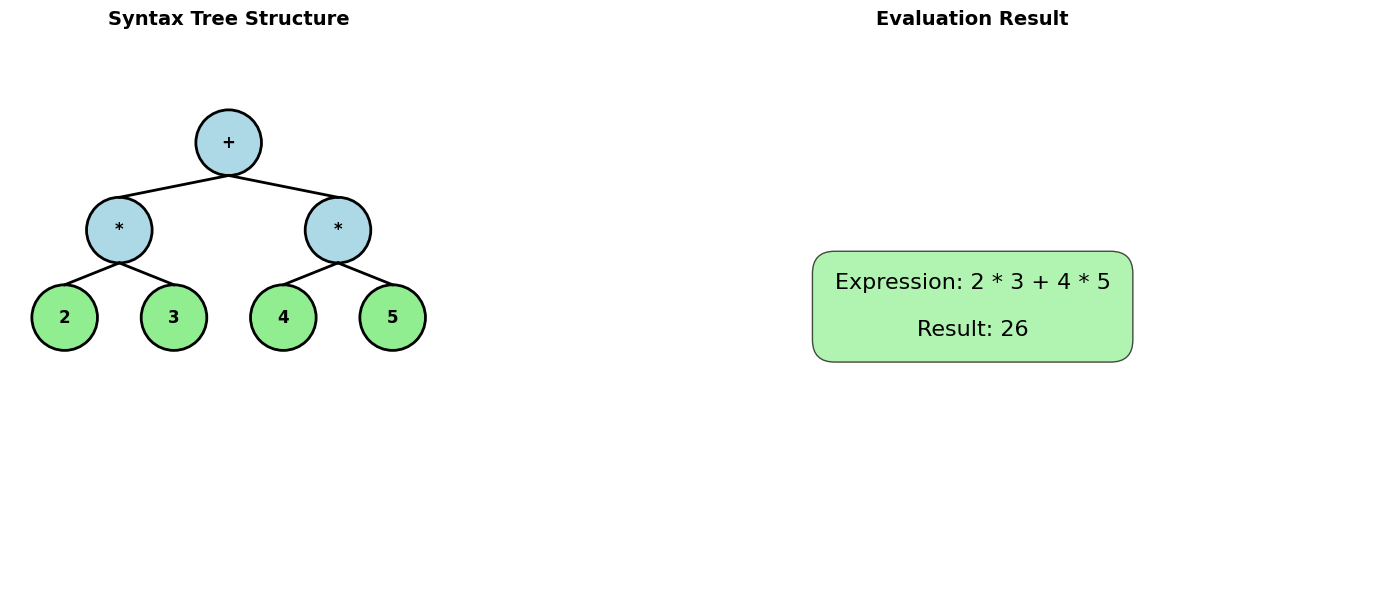

Result: 26
------------------------------


In [6]:
# Interactive expression parser
def parse_and_visualize(expression):
    """Parse an expression and visualize its syntax tree"""
    try:
        tree = tree_builder.parse_expression(expression)
        result = tree_builder.evaluate_tree(tree)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Visualize tree
        tree_builder.visualize_tree(tree, ax1)
        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-2, 0.5)
        ax1.set_aspect('equal')
        ax1.set_title('Syntax Tree Structure', fontsize=14, fontweight='bold')
        ax1.axis('off')
        
        # Show evaluation
        ax2.text(0.5, 0.5, f'Expression: {expression}\n\nResult: {result}', 
                ha='center', va='center', fontsize=16, 
                bbox=dict(boxstyle='round,pad=1', facecolor='lightgreen', alpha=0.7))
        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)
        ax2.axis('off')
        ax2.set_title('Evaluation Result', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        return tree, result
        
    except Exception as e:
        print(f"Error parsing expression '{expression}': {e}")
        return None, None

# Try some example expressions
expressions = [
    "1 + 2 * 3",
    "(1 + 2) * 3",
    "10 - 5 + 2",
    "2 * 3 + 4 * 5"
]

print("🔍 Parsing example expressions:")
print("=" * 40)

for expr in expressions:
    print(f"\nExpression: {expr}")
    tree, result = parse_and_visualize(expr)
    if tree:
        print(f"Result: {result}")
    print("-" * 30)


## Configuration for Thebe

To make this work with Thebe, you need to add the following to your `_config.yml`:

```yaml
html:
  extra_navbar: |
    <div class="navbar-nav">
      <a class="nav-link" href="https://mybinder.org/v2/gh/YOUR_USERNAME/YOUR_REPO/master?urlpath=tree/docs">
        <i class="fas fa-external-link-alt"></i> Launch Binder
      </a>
    </div>
  
sphinx:
  config:
    # Enable Thebe for interactive cells
    thebe_config:
      repository_url: "https://github.com/YOUR_USERNAME/YOUR_REPO"
      repository_branch: "master"
      binderhub_url: "https://mybinder.org"
      selector: ".thebe-init"
```

## Benefits of Thebe + Binder

1. **No Installation Required**: Users can run code without installing anything
2. **Always Up-to-Date**: Binder creates a fresh environment with the latest dependencies
3. **Shareable**: Anyone with the link can run your code
4. **Reproducible**: Same environment every time
5. **Interactive Learning**: Students can experiment with code directly in the book

## Next Steps

1. Set up your GitHub repository with a `requirements.txt` file
2. Configure Thebe in your `_config.yml`
3. Build your book with `jupyter-book build .`
4. Deploy to GitHub Pages or any static hosting service

Your readers will then be able to click "Run" on any code cell and execute it in a live Jupyter environment!


Text(value='2 + 3 * 4', description='Expression:', placeholder='Enter expression (e.g., 2 + 3 * 4)', style=Tex…

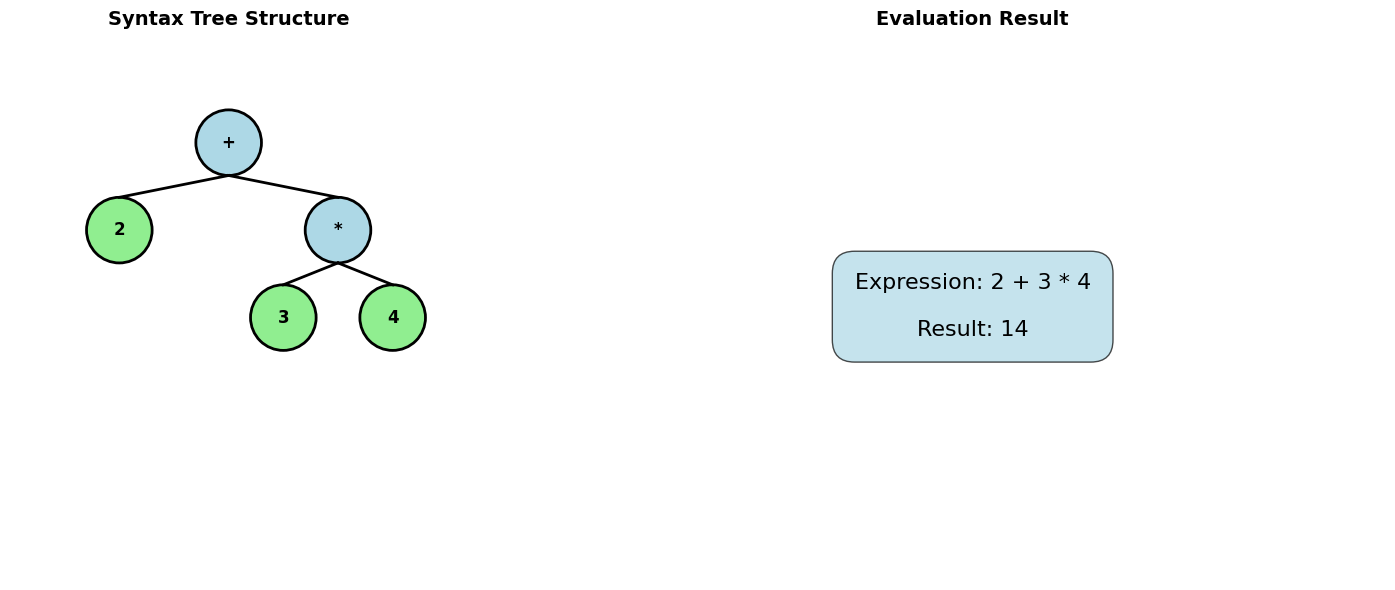


Tree Structure for '2 + 3 * 4':
{
  "type": "BinaryOp",
  "op": "+",
  "left": {
    "type": "Number",
    "value": 2
  },
  "right": {
    "type": "BinaryOp",
    "op": "*",
    "left": {
      "type": "Number",
      "value": 3
    },
    "right": {
      "type": "Number",
      "value": 4
    }
  }
}


In [7]:
class SyntaxTreeBuilder:
    def __init__(self):
        self.tree_data = {}
    
    def parse_expression(self, expr):
        """Simple recursive descent parser for arithmetic expressions"""
        expr = expr.replace(' ', '')
        
        # Handle parentheses
        if expr.startswith('(') and expr.endswith(')'):
            return self.parse_expression(expr[1:-1])
        
        # Find the rightmost + or - (lowest precedence)
        paren_count = 0
        for i in range(len(expr) - 1, -1, -1):
            if expr[i] == ')':
                paren_count += 1
            elif expr[i] == '(':
                paren_count -= 1
            elif paren_count == 0 and expr[i] in '+-':
                return {
                    'type': 'BinaryOp',
                    'op': expr[i],
                    'left': self.parse_expression(expr[:i]),
                    'right': self.parse_expression(expr[i+1:])
                }
        
        # Find the rightmost * or / (higher precedence)
        paren_count = 0
        for i in range(len(expr) - 1, -1, -1):
            if expr[i] == ')':
                paren_count += 1
            elif expr[i] == '(':
                paren_count -= 1
            elif paren_count == 0 and expr[i] in '*/':
                return {
                    'type': 'BinaryOp',
                    'op': expr[i],
                    'left': self.parse_expression(expr[:i]),
                    'right': self.parse_expression(expr[i+1:])
                }
        
        # If it's just a number or variable
        if expr.isdigit() or (expr[0] == '-' and expr[1:].isdigit()):
            return {'type': 'Number', 'value': int(expr)}
        else:
            return {'type': 'Variable', 'name': expr}
    
    def visualize_tree(self, tree, ax=None, x=0, y=0, width=1, level=0):
        if ax is None:
            fig, ax = plt.subplots(figsize=(12, 8))
        
        # Draw current node
        if tree['type'] == 'BinaryOp':
            node_text = tree['op']
            color = 'lightblue'
        elif tree['type'] == 'Number':
            node_text = str(tree['value'])
            color = 'lightgreen'
        else:  # Variable
            node_text = tree['name']
            color = 'lightcoral'
        
        # Draw node
        circle = plt.Circle((x, y), 0.15, color=color, ec='black', linewidth=2)
        ax.add_patch(circle)
        ax.text(x, y, node_text, ha='center', va='center', fontsize=12, fontweight='bold')
        
        # Draw children
        if tree['type'] == 'BinaryOp':
            left_x = x - width/2
            right_x = x + width/2
            child_y = y - 0.4
            
            # Draw edges
            ax.plot([x, left_x], [y-0.15, child_y+0.15], 'k-', linewidth=2)
            ax.plot([x, right_x], [y-0.15, child_y+0.15], 'k-', linewidth=2)
            
            # Recursively draw children
            self.visualize_tree(tree['left'], ax, left_x, child_y, width/2, level+1)
            self.visualize_tree(tree['right'], ax, right_x, child_y, width/2, level+1)
    
    def evaluate_tree(self, tree, variables=None):
        if variables is None:
            variables = {}
        
        if tree['type'] == 'Number':
            return tree['value']
        elif tree['type'] == 'Variable':
            return variables.get(tree['name'], 0)
        elif tree['type'] == 'BinaryOp':
            left_val = self.evaluate_tree(tree['left'], variables)
            right_val = self.evaluate_tree(tree['right'], variables)
            
            if tree['op'] == '+':
                return left_val + right_val
            elif tree['op'] == '-':
                return left_val - right_val
            elif tree['op'] == '*':
                return left_val * right_val
            elif tree['op'] == '/':
                return left_val / right_val if right_val != 0 else float('inf')
        
        return 0

# Create the tree builder
tree_builder = SyntaxTreeBuilder()

# Create interactive widgets
expression_input = widgets.Text(
    value='2 + 3 * 4',
    placeholder='Enter expression (e.g., 2 + 3 * 4)',
    description='Expression:',
    style={'description_width': 'initial'}
)

def build_and_visualize_tree(expr):
    try:
        tree = tree_builder.parse_expression(expr)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Visualize tree
        tree_builder.visualize_tree(tree, ax1)
        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-2, 0.5)
        ax1.set_aspect('equal')
        ax1.set_title('Syntax Tree Structure', fontsize=14, fontweight='bold')
        ax1.axis('off')
        
        # Show evaluation
        result = tree_builder.evaluate_tree(tree)
        ax2.text(0.5, 0.5, f'Expression: {expr}\n\nResult: {result}', 
                ha='center', va='center', fontsize=16, 
                bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', alpha=0.7))
        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)
        ax2.axis('off')
        ax2.set_title('Evaluation Result', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Print tree structure
        print(f"\nTree Structure for '{expr}':")
        print("=" * 40)
        print(json.dumps(tree, indent=2))
        
    except Exception as e:
        print(f"Error parsing expression: {e}")
        print("Please use valid arithmetic expressions with +, -, *, /, parentheses, and numbers.")

def on_expression_submit(change):
    clear_output(wait=True)
    display(expression_input)
    build_and_visualize_tree(change['new'])

expression_input.observe(on_expression_submit, names='value')
display(expression_input)
build_and_visualize_tree('2 + 3 * 4')
